In [26]:
from cv_bridge import CvBridge
from rosbags.rosbag2 import Reader
from rosbags.typesys import Stores, get_typestore
from tqdm import tqdm

import cv2

import matplotlib.pyplot as plt

In [ ]:
bridge = CvBridge()

In [30]:
# Create a typestore and get the string class.
typestore = get_typestore(Stores.LATEST)

# Create reader instance and open for reading.
with Reader('../../2022-11-17_pietons/Acquis2805_grise/') as reader:

    # Iterate over messages.
    for connection, timestamp, rawdata in reader.messages():
        if connection.topic == '/d435i/color/image_raw':
            msg = typestore.deserialize_cdr(rawdata, connection.msgtype)
            print(msg.header.frame_id)
            break

camera_color_optical_frame


In [23]:
msg.height, msg.width

(720, 1280)

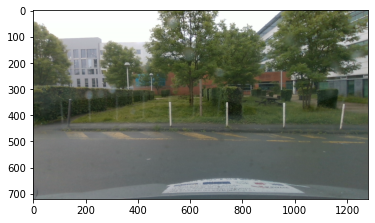

In [24]:
plt.imshow(bridge.imgmsg_to_cv2(msg))

In [29]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(filename="supp.mp4", 
                    fourcc=fourcc, 
                    fps=15, 
                    frameSize=(msg.width, msg.height))

with Reader('../../2022-11-17_pietons/Acquis2805_grise/') as reader:
    print(reader.message_count)
    # Iterate over messages.
    for connection, timestamp, rawdata in tqdm(reader.messages()):
        if connection.topic == '/d435i/color/image_raw':
            msg = typestore.deserialize_cdr(rawdata, connection.msgtype)
            video.write(bridge.imgmsg_to_cv2(msg, desired_encoding="bgr8"))
video.release()

92566


92566it [01:33, 988.41it/s] 
